In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

**FASE 1: EXPLORACION Y LIMPIEZA DE LOS DATOS**

In [2]:
df_customer_flight= pd.read_csv("file/Customer Flight Activity.csv", index_col=0)
df_customer_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [41]:
df_customer_flight["Year"].unique()

array([2017, 2018])

## Los comentarios respecto a la observación de esta tabla se encuentran dentro del archivo llamado documentación.md 
## Ahora empezamos a hacer las exploraciones de la tabla

In [3]:
df_customer_flight.shape


(405624, 9)

In [4]:
df_customer_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [5]:
# Saco el resumen estadistico de las columnas numericas
df_customer_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [6]:
# busco los nulos
df_customer_flight.isna().sum()/df_customer_flight.shape[0]*100

Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [7]:
# Reviso si existen valores duplicados
df_customer_flight.duplicated()

Loyalty Number
100018    False
100102    False
100140    False
100214    False
100272     True
          ...  
999902     True
999911     True
999940    False
999982     True
999986     True
Length: 405624, dtype: bool

In [8]:
df_customer_flight.duplicated().sum()

np.int64(228705)

In [42]:
df_customer_flight["Year"].unique()

array([2017, 2018])

In [9]:
# LLamo la otra base de datos 
df_customer_loyalty= pd.read_csv("file/Customer Loyalty History.csv", index_col=0)
df_customer_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [10]:
df_customer_loyalty.shape

(16737, 15)

In [11]:
df_customer_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [12]:
# Saco el resumen estadistico de la columnas numericas
df_customer_loyalty.describe(include=object).T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [13]:
# busco los nulos
df_customer_loyalty.isna().sum()/df_customer_loyalty.shape[0]*100

Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [14]:
# Reviso si existen valores duplicados
df_customer_loyalty.duplicated()

Loyalty Number
480934    False
549612    False
429460    False
608370    False
530508    False
          ...  
823768    False
680886    False
776187    False
906428    False
652627    False
Length: 16737, dtype: bool

In [15]:
df_customer_loyalty.duplicated().sum()

np.int64(0)

In [16]:
## union de DF, utilizo el método Merge porque me permite unirlos por una columna comun que ya he identificado (loyalty number)
df_customer = df_customer_flight.merge(df_customer_loyalty, on=["Loyalty Number"], how="right")
df_customer.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
480934,2017,2,3,0,3,2823,282.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
480934,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
480934,2017,4,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
480934,2018,10,6,2,8,3352,335.0,465,38,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


In [17]:
# confirmo que se han unido
df_customer.shape

(405624, 24)

In [21]:
# En el estudio exploratorio de las 2 df duplicadas he observados filas duplicadas y valores nulos, ahora gestiono esto de manera conjunta en todo el DF
#Primero, veo cuantas filas duplicadas hay 

In [23]:
#Elimino las filas duplicadas
df_customer= df_customer.drop_duplicates()

In [25]:
df_customer.duplicated().sum()

np.int64(0)

In [27]:
# ahora gestiono mis nulos.
# Convertimos los nulos de 'Cancellation Year' y 'Cancellation Month' a 0 :porque los clientes activos no tienen año de cancelación y 'Activo' para identificar clientes que siguen en el programa.
#Creo por asignación directa una nueva columna “Loyalty Status”
# Activo si el valor en “Cancellation Month” es NaN
# Cancelled si no es NaN
df_customer["Cancelattion"] = df_customer["Cancellation Month"].apply( lambda dato: "Active" if pd.isna(dato) else "Cancelled")


In [30]:
df_customer.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancelattion
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,,
480934,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Active
480934,2017,2,3,0,3,2823,282.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Active
480934,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Active
480934,2017,4,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Active
480934,2018,10,6,2,8,3352,335.0,465,38,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Active


In [31]:
# Reemplazar los nulos en la columna "Salario" con la mediana
#fillna() reemplaza los NaN por el valor que le pases.#median() calcula la mediana de la columna "Salario"# inplace=True modifica el DataFrame directamente (sin necesidad de reasignarlo).
df_customer["Salary"].fillna(df_customer["Salary"].median(), inplace=True)

In [32]:
df_customer['Salary'].isnull().sum()

np.int64(0)

**FASE 2: VISUALIZACION**

In [ ]:
#Agrupo y cuento las reservas por mes
df_grouped = df_customer.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
df_grouped.head()

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279


#¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 
En el gráfico de barra que se presenta a continuación, se puede observar que si comparamos los años 2017 y 2018 el año 2018 en donde se producen mayor cantidad de reservas, sobre todo durante los meses de junio, julio y agosto 

<Axes: xlabel='Month', ylabel='Flights Booked'>

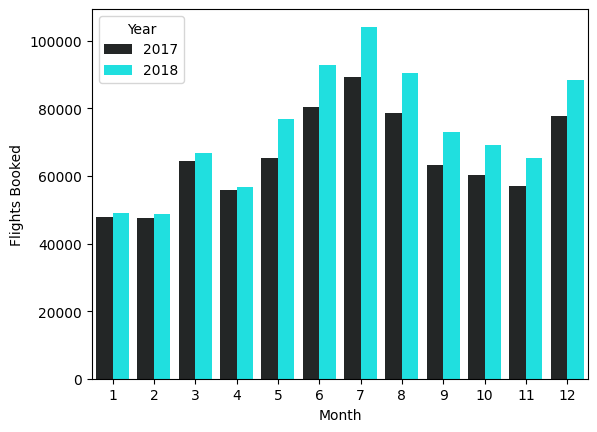

In [48]:
sns.barplot(x = "Month", y = "Flights Booked", data = df_grouped, hue="Year", color= "aqua",errorbar=None)

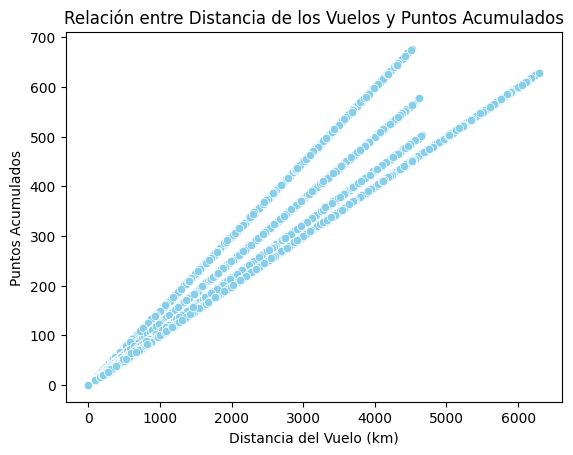

In [36]:
# ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Crear el gráfico de dispersión con seaborn
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_customer, color='skyblue')

# Títulos y etiquetas
plt.title('Relación entre Distancia de los Vuelos y Puntos Acumulados')
plt.xlabel('Distancia del Vuelo (km)')
plt.ylabel('Puntos Acumulados')

# Mostrar el gráfico
plt.show()

In [84]:
df_sin_duplicados.describe()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,1848.000000,1848.000000,1848.0,1848.0,1848.0,1848.0,1848.0,1848.0,1848.0,1848.000000,1848.000000,1848.000000,1848.000000,414.000000,414.000000
mean,2017.425325,6.212662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79780.793290,8128.828057,2015.650974,6.746753,2015.920290,7.487923
std,0.494526,3.453726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32587.599224,6875.115970,1.947869,3.606188,1.692005,2.571703
min,2017.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24287.000000,1904.000000,2012.000000,1.000000,2013.000000,1.000000
25%,2017.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63501.000000,4328.370000,2014.000000,4.000000,2015.000000,7.000000
50%,2017.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73602.000000,5715.790000,2016.000000,7.000000,2015.000000,8.000000
75%,2018.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84981.000000,8447.890000,2017.000000,10.000000,2018.000000,10.000000
max,2018.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229203.000000,41787.900000,2018.000000,12.000000,2018.000000,11.000000


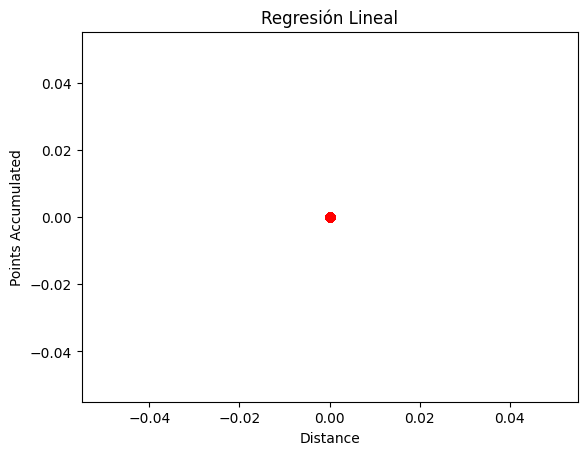

In [83]:
sns.regplot(x='Distance', y='Points Accumulated', data=df_sin_duplicados, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title("Regresión Lineal")
plt.show()